# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (5/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk5.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,47357,2,"MILK, COW'S, FLUID, 2% FAT (106.75); MILK, COW...",2136,95.24,308.20,179.02,18.2,60.43,...,1,1.24,NaN,0.0,0.0,NaN,NaN,47357_NHANES_2007_2008,2136; 95.24; 308.2; 179.02; 18.2; 60.43,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,47390,2,"MILK, CHOCOLATE, RED FAT, 2% (250); CHICKEN, B...",990,41.00,127.98,70.99,5.7,36.13,...,3,0.75,NaN,0.0,0.0,NaN,NaN,47390_NHANES_2007_2008,990; 41.0; 127.98; 70.99; 5.7; 36.13,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,47406,2,"EGGS, WHOLE, FRIED (INCL SCRAMBLED, NO MILK AD...",1027,29.72,146.64,55.70,5.2,39.18,...,4,1.28,NaN,0.0,0.0,0.0,NaN,47406_NHANES_2007_2008,1027; 29.72; 146.64; 55.7; 5.2; 39.18,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,47417,2,"MILK, COW'S, FLUID, WHOLE (259.25); ICE CREAM,...",3589,127.65,488.08,312.60,16.9,130.47,...,1,0.32,NaN,0.0,0.0,0.0,NaN,47417_NHANES_2007_2008,3589; 127.65; 488.08; 312.6; 16.9; 130.47,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,47423,2,"MILK, COW'S, FLUID, 2% FAT (183); ICE CREAM, R...",1906,69.99,243.25,96.13,14.9,74.86,...,3,0.70,NaN,0.0,0.0,NaN,NaN,47423_NHANES_2007_2008,1906; 69.99; 243.25; 96.13; 14.9; 74.86,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,58548,2,"YOGURT, VANILLA, LEMON, COFFEE, LOWFAT MILK (1...",3011,93.13,359.25,221.80,18.2,138.13,...,1,5.00,NaN,0.0,0.0,0.0,NaN,58548_NHANES_2009_2010,3011; 93.13; 359.25; 221.8; 18.2; 138.13,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,58566,2,"MILK, COW'S, FLUID, 2% FAT (198.25); CHEESE, P...",3654,91.32,607.26,395.01,18.0,99.47,...,1,1.36,NaN,0.0,0.0,0.0,NaN,58566_NHANES_2009_2010,3654; 91.32; 607.26; 395.01; 18.0; 99.47,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,58589,2,"MILK, COW'S, FLUID, WHOLE (183); FRUITY PEBBLE...",926,29.72,145.87,73.46,6.6,24.97,...,4,1.16,NaN,0.0,0.0,NaN,NaN,58589_NHANES_2009_2010,926; 29.72; 145.87; 73.46; 6.6; 24.97,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,58602,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (490); CHEE...",2204,115.24,342.49,133.91,39.5,49.92,...,3,5.00,NaN,0.0,0.0,0.0,NaN,58602_NHANES_2009_2010,2204; 115.24; 342.49; 133.91; 39.5; 49.92,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 54. I.e., these rows need post-processing.
Consistent rows: 1074. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
13,13,47491,2,"BOLOGNA, NFS (28); DOUBLE CHEESEBURGER W/TOMAT...",2035,75.57,271.29,95.53,17.3,72.48,...,4,4.84,NaN,0.0,0.0,0.0,NaN,47491_NHANES_2007_2008,2035; 75.57; 271.29; 95.53; 17.3; 72.48,USER:\n\nPlease analyze the patient's dietary ...
25,25,47585,2,"YOGURT, FRUIT VARIETY, LOWFAT MILK (64); CHEES...",663,17.70,113.18,73.49,3.0,15.88,...,2,3.13,NaN,0.0,0.0,NaN,NaN,47585_NHANES_2007_2008,663; 17.7; 113.18; 73.49; 3.0; 15.88,USER:\n\nPlease analyze the patient's dietary ...
58,58,47946,2,"SPAGHETTI SAUCE W/ BEEF/MEAT, HOMEMADE-STYLE (...",687,23.02,128.93,27.08,12.3,9.74,...,5,1.39,NaN,0.0,0.0,NaN,NaN,47946_NHANES_2007_2008,687; 23.02; 128.93; 27.08; 12.3; 9.74,USER:\n\nPlease analyze the patient's dietary ...
62,62,47998,2,"MILK, CHOCOLATE, RED FAT, 2% (250); CHEESE, NA...",2051,82.87,275.80,113.78,19.1,70.29,...,1,1.45,NaN,0.0,0.0,0.0,NaN,47998_NHANES_2007_2008,2051; 82.87; 275.8; 113.78; 19.1; 70.29,USER:\n\nPlease analyze the patient's dietary ...
102,102,48371,2,"CHEESE, MOZZARELLA, PART SKIM (INCL ""LOWFAT"") ...",2455,125.43,225.23,75.52,8.9,116.70,...,3,2.63,NaN,0.0,0.0,0.0,NaN,48371_NHANES_2007_2008,2455; 125.43; 225.23; 75.52; 8.9; 116.7,USER:\n\nPlease analyze the patient's dietary ...
128,128,48595,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (183.75); C...",337,27.64,47.89,32.37,1.1,4.03,...,2,1.16,NaN,0.0,0.0,0.0,NaN,48595_NHANES_2007_2008,337; 27.64; 47.89; 32.37; 1.1; 4.03,USER:\n\nPlease analyze the patient's dietary ...
166,166,48982,2,"MILK, COW'S, FLUID, WHOLE (198.25); MILK, COW'...",1371,52.96,208.43,126.84,8.0,39.21,...,1,1.55,NaN,0.0,0.0,0.0,NaN,48982_NHANES_2007_2008,1371; 52.96; 208.43; 126.84; 8.0; 39.21,USER:\n\nPlease analyze the patient's dietary ...
192,192,49336,2,"MILK, COW'S, FLUID, 2% FAT (488); MILK, CHOCOL...",2428,115.81,322.98,184.98,14.5,76.73,...,3,5.00,NaN,0.0,0.0,NaN,NaN,49336_NHANES_2007_2008,2428; 115.81; 322.98; 184.98; 14.5; 76.73,USER:\n\nPlease analyze the patient's dietary ...
222,222,49677,2,"MILK, COW'S, FLUID, 2% FAT (76.25); MILK, CHOC...",2657,88.81,427.17,284.87,16.5,74.78,...,4,0.71,NaN,0.0,0.0,0.0,NaN,49677_NHANES_2007_2008,2657; 88.81; 427.17; 284.87; 16.5; 74.78,USER:\n\nPlease analyze the patient's dietary ...
250,250,49941,2,"MILK, COW'S, FLUID, 2% FAT (533.75); COCOA & S...",2941,118.49,384.06,241.31,19.6,105.37,...,1,NaN,NaN,0.0,0.0,0.0,NaN,49941_NHANES_2007_2008,2941; 118.49; 384.06; 241.31; 19.6; 105.37,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1074, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,47357,2,"MILK, COW'S, FLUID, 2% FAT (106.75); MILK, COW...",2136,95.24,308.20,179.02,18.2,60.43,...,NaN,47357_NHANES_2007_2008,2136; 95.24; 308.2; 179.02; 18.2; 60.43,2591; 105.15; 390.11; 269.0; 16.3; 74.71,2591,105.15,390.11,269.00,16.3,74.71
1,1,47390,2,"MILK, CHOCOLATE, RED FAT, 2% (250); CHICKEN, B...",990,41.00,127.98,70.99,5.7,36.13,...,NaN,47390_NHANES_2007_2008,990; 41.0; 127.98; 70.99; 5.7; 36.13,1206; 46.82; 139.0; 79.71; 4.3; 53.0,1206,46.82,139.00,79.71,4.3,53.00
2,2,47406,2,"EGGS, WHOLE, FRIED (INCL SCRAMBLED, NO MILK AD...",1027,29.72,146.64,55.70,5.2,39.18,...,NaN,47406_NHANES_2007_2008,1027; 29.72; 146.64; 55.7; 5.2; 39.18,1056; 28.76; 154.11; 75.17; 5.4; 36.96,1056,28.76,154.11,75.17,5.4,36.96
3,3,47417,2,"MILK, COW'S, FLUID, WHOLE (259.25); ICE CREAM,...",3589,127.65,488.08,312.60,16.9,130.47,...,NaN,47417_NHANES_2007_2008,3589; 127.65; 488.08; 312.6; 16.9; 130.47,3395; 114.78; 480.11; 285.5; 15.6; 116.7,3395,114.78,480.11,285.50,15.6,116.70
4,4,47423,2,"MILK, COW'S, FLUID, 2% FAT (183); ICE CREAM, R...",1906,69.99,243.25,96.13,14.9,74.86,...,NaN,47423_NHANES_2007_2008,1906; 69.99; 243.25; 96.13; 14.9; 74.86,2075; 70.06; 289.1; 113.91; 15.6; 75.8,2075,70.06,289.10,113.91,15.6,75.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,58548,2,"YOGURT, VANILLA, LEMON, COFFEE, LOWFAT MILK (1...",3011,93.13,359.25,221.80,18.2,138.13,...,NaN,58548_NHANES_2009_2010,3011; 93.13; 359.25; 221.8; 18.2; 138.13,3011; 89.8; 390.8; 211.91; 16.3; 128.3,3011,89.80,390.80,211.91,16.3,128.30
1124,1124,58566,2,"MILK, COW'S, FLUID, 2% FAT (198.25); CHEESE, P...",3654,91.32,607.26,395.01,18.0,99.47,...,NaN,58566_NHANES_2009_2010,3654; 91.32; 607.26; 395.01; 18.0; 99.47,3395; 107.1; 503.8; 311.91; 12.6; 110.6,3395,107.10,503.80,311.91,12.6,110.60
1125,1125,58589,2,"MILK, COW'S, FLUID, WHOLE (183); FRUITY PEBBLE...",926,29.72,145.87,73.46,6.6,24.97,...,NaN,58589_NHANES_2009_2010,926; 29.72; 145.87; 73.46; 6.6; 24.97,1136; 39.82; 169.03; 90.71; 6.3; 33.65,1136,39.82,169.03,90.71,6.3,33.65
1126,1126,58602,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (490); CHEE...",2204,115.24,342.49,133.91,39.5,49.92,...,NaN,58602_NHANES_2009_2010,2204; 115.24; 342.49; 133.91; 39.5; 49.92,2035; 110.8; 301.1; 99.11; 27.9; 44.71,2035,110.80,301.10,99.11,27.9,44.71


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,64264.3808,171.3417,0.0992,253.5042,0.9252
DRxIPROT,133.7739,8.0937,0.1275,11.5661,0.9184
DRxICARB,1692.4580,27.6971,0.1280,41.1395,0.8973
DRxISUGR,687.6876,17.0694,0.1723,26.2238,0.8738
DRxIFIBE,14.7645,2.2385,0.1704,3.8425,0.7974
DRxITFAT,190.1047,9.3681,0.1438,13.7878,0.8929


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-5.095507,4.108000e-07
DRxIPROT,-6.304947,4.000000e-10
DRxICARB,-8.410291,0.000000e+00
DRxISUGR,-2.524992,1.171328e-02
DRxIFIBE,9.374048,0.000000e+00
DRxITFAT,3.215160,1.342625e-03


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

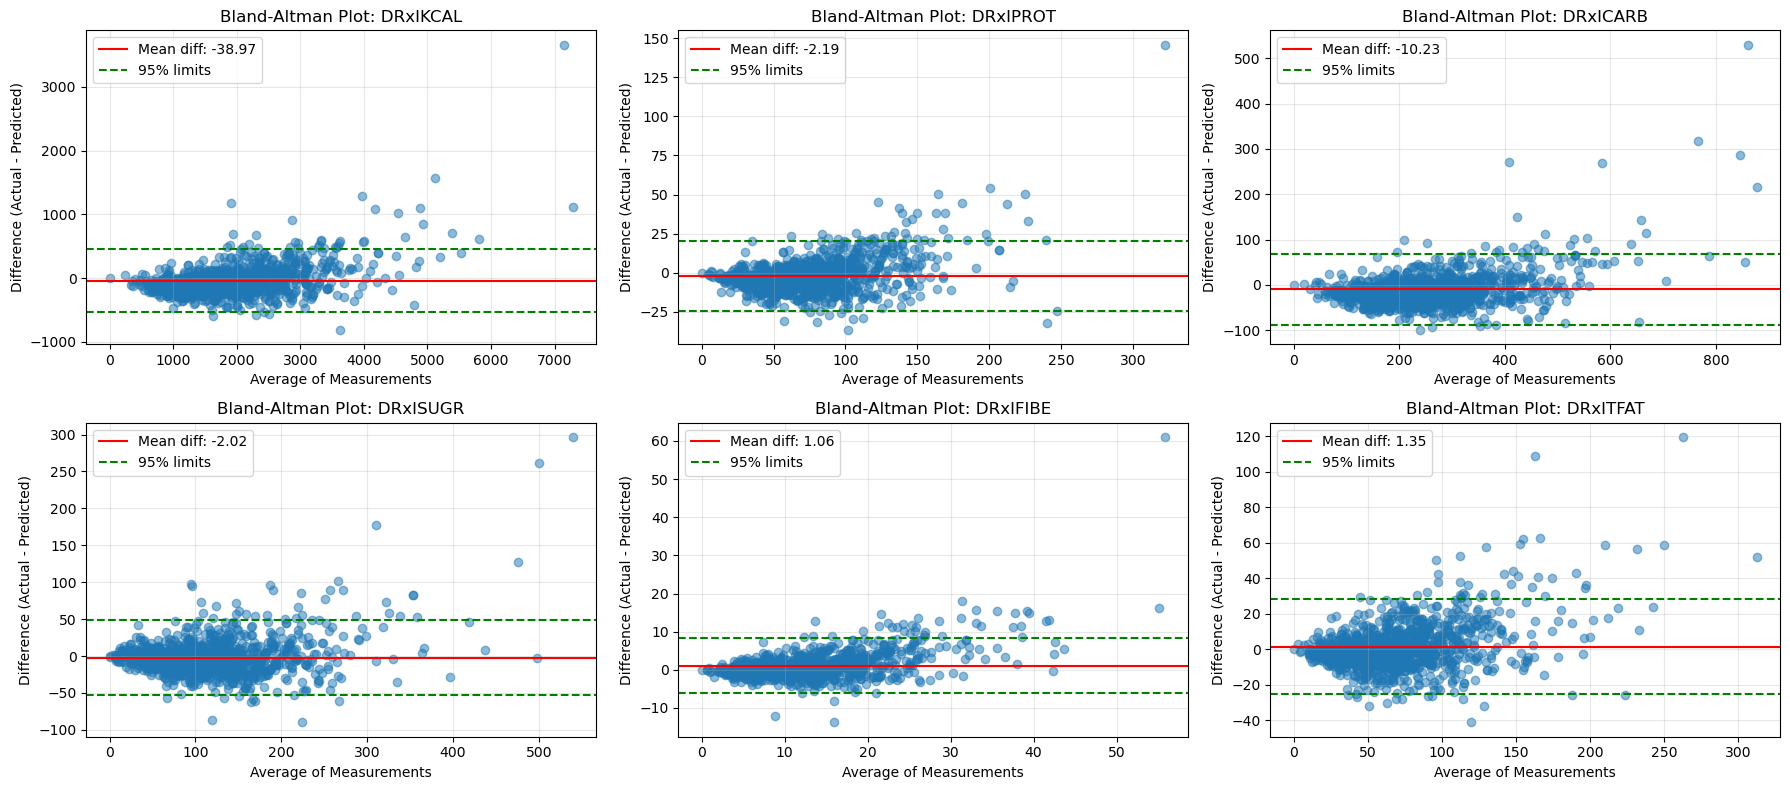

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.946904
DRxIPROT 0.943485
DRxITFAT 0.929239
DRxICARB 0.924903
DRxISUGR 0.924478
DRxIFIBE 0.831090

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9908


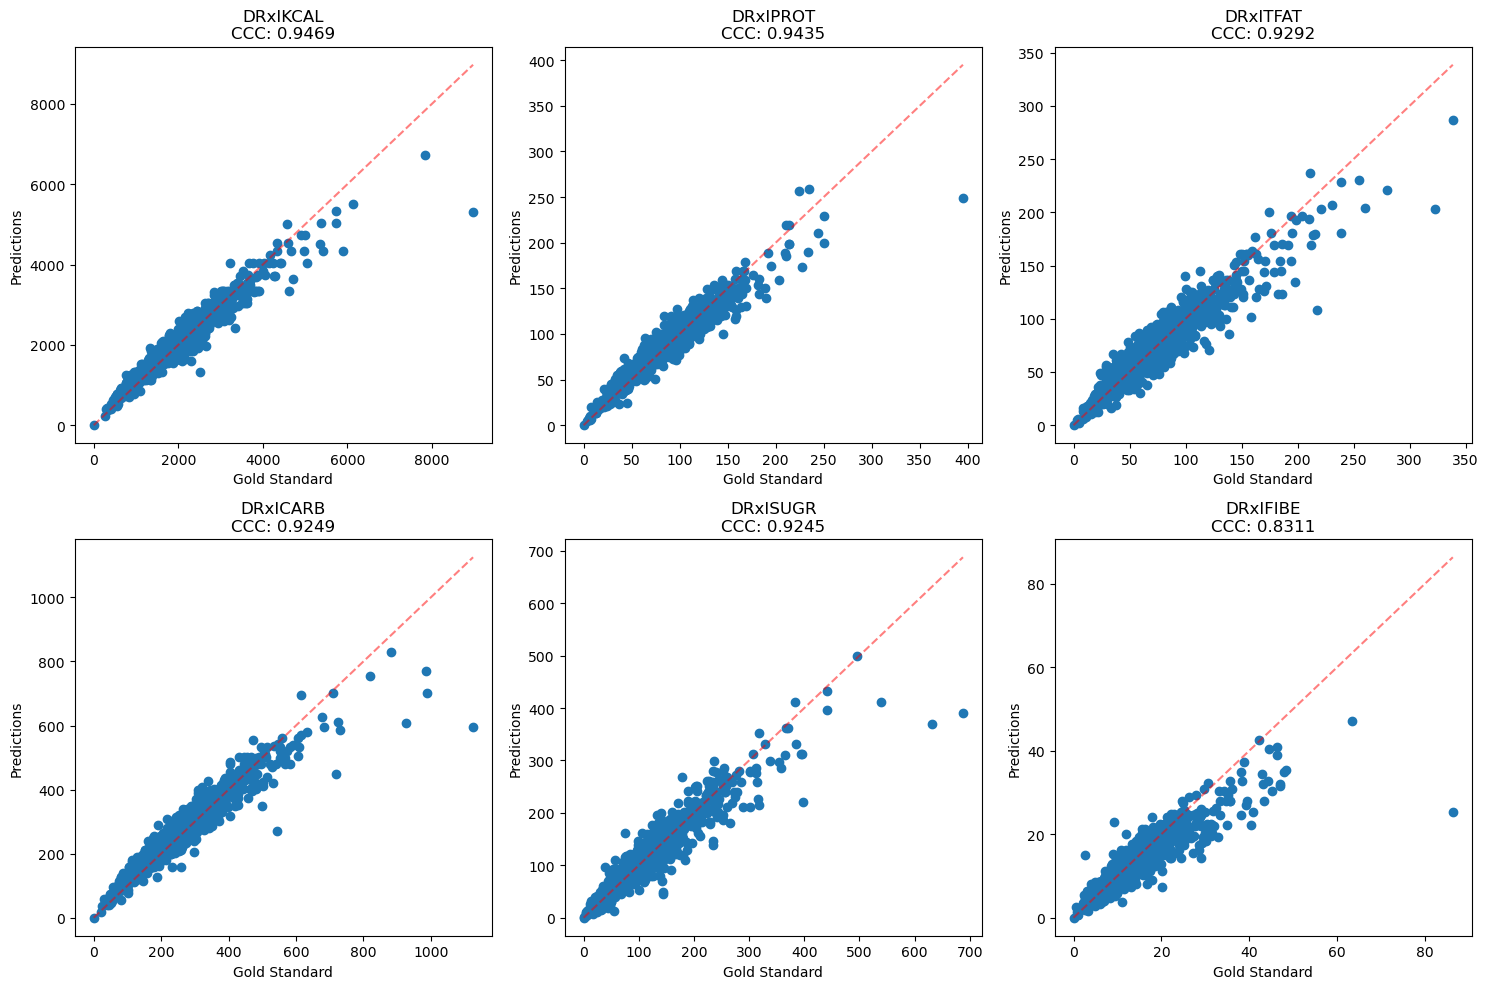

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()